In [2]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Loading and Cleaning the Data

In [3]:
# load the data
data = pd.read_csv('space_decay.csv')
data.head()

#drop the comment column and creation date
data.drop(['CREATION_DATE'], axis=1, inplace=True)
data.drop(['COMMENT'], axis=1, inplace=True)
data.head()

,CCSDS_OMM_VERS,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,2021-10-31T22:46:50.340864,2.921700,...,MEDIUM,FR,1992.0,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,2021-10-31T16:32:17.360448,13.754973,...,SMALL,CIS,1979.0,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...
2,2,18 SPCS,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,2021-11-01T05:22:43.421952,1.038224,...,LARGE,IND,2001.0,SRI,NaN,3195026,188609573,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...
3,2,18 SPCS,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,2021-10-31T11:11:24.198720,14.775907,...,SMALL,PRC,1999.0,TSC,NaN,3194431,188556894,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...
4,2,18 SPCS,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,2021-10-31T17:46:46.681248,14.724482,...,SMALL,PRC,1999.0,TSC,NaN,3194950,188592541,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...


In [4]:
# drop entires with TBA Object Type
data = data[data.OBJECT_TYPE != 'TBA']

data['RCS_SIZE'] = data['RCS_SIZE'].replace(to_replace={'LARGE':'Large','MEDIUM':'Medium',"SMALL":"Small"})
data['OBJECT_TYPE'] = data['OBJECT_TYPE'].replace(to_replace={'PAYLOAD':'Payload','ROCKET BODY':'Rocket Body',"DEBRIS":"Debris"})

print(data['RCS_SIZE'].unique())
print(data['OBJECT_TYPE'].unique())

['Medium' 'Small' 'Large' nan]
['Debris' 'Payload' 'Rocket Body']


### Plotting

[1992 1979 2001 1999 1965 1984 1981 1985 1991 1988 1989 1966 1970 1975
 1978 1980 1977 1993 1987 1986 1990 2002 2000 1961 1963 1968 1997 1998
 2003 1971 1994 1969 1976 1982 1983 2004 1964 1962 2005 1974 2006 1967
 2007 1995 1996 2008 2009 1972 2010 2011 2012 2013 1973 2014 2015 2016
 2017 2018 2019 2020 2021]


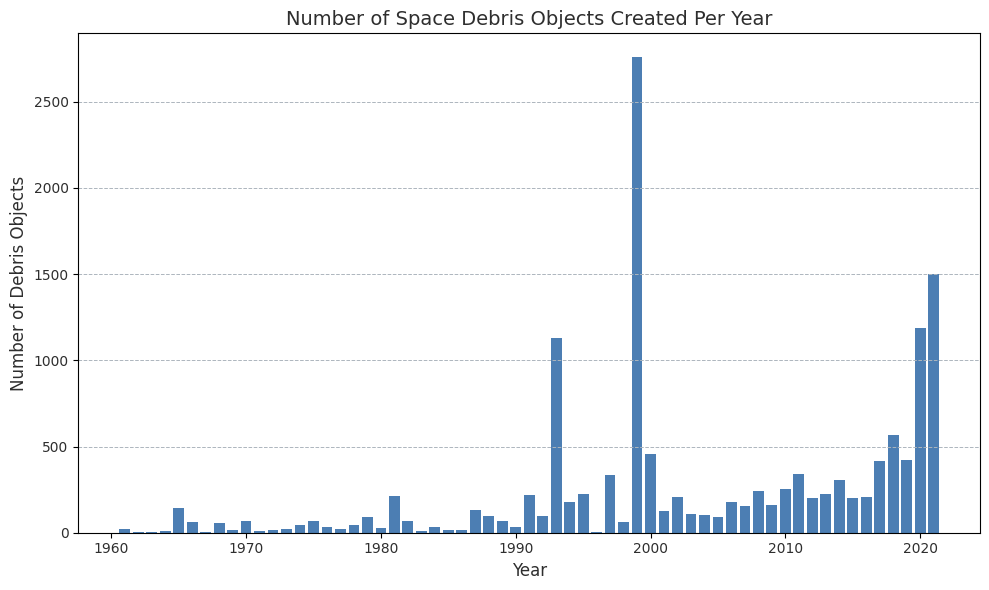

In [19]:
# convert the LAUNCH_DATE variables to show ie. 1992 instead of 1992.01
data['LAUNCH_DATE'] = data['LAUNCH_DATE'].apply(lambda x: int(x))
print(data['LAUNCH_DATE'].unique())


# Group by year to count the number of objects created each year
yearly_debris = data.groupby('LAUNCH_DATE').size().reset_index(name='Count')

# Define the color palette
colors = {
    'Primary Blue': '#4C7EB3',
    'Star Gold': '#FFC857',
    'Satellite Gray': '#ADB5BD',
    'Rocket Red': '#FF6F61',
    'Vacuum Black': '#2E2E2E',
    'Orbital White': '#F2F2F2',
    'Nebula Purple': '#845EC2'
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_debris['LAUNCH_DATE'], yearly_debris['Count'], color=colors['Primary Blue'])

# Customize the plot
plt.title('Number of Space Debris Objects Created Per Year', fontsize=14, color=colors['Vacuum Black'])
plt.xlabel('Year', fontsize=12, color=colors['Vacuum Black'])
plt.ylabel('Number of Debris Objects', fontsize=12, color=colors['Vacuum Black'])
plt.grid(axis='y', linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
plt.xticks(color=colors['Vacuum Black'], fontsize=10)
plt.yticks(color=colors['Vacuum Black'], fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

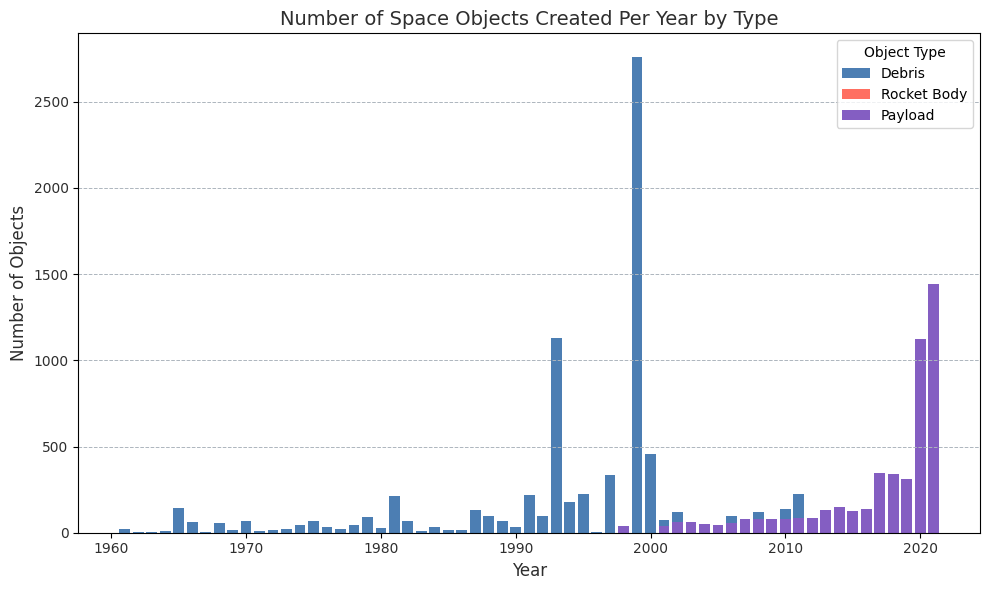

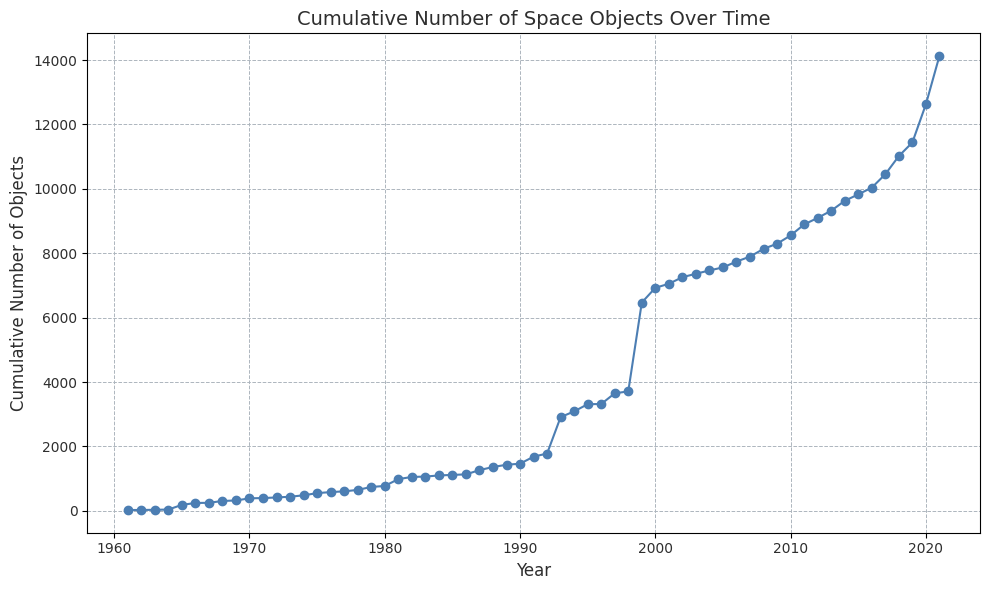

In [20]:
# Group by year and object type to count the number of objects created each year
yearly_debris_by_type = data.groupby(['LAUNCH_DATE', 'OBJECT_TYPE']).size().reset_index(name='Count')

# Group by year to calculate cumulative debris count
cumulative_debris = (
    data.groupby('LAUNCH_DATE')
    .size()
    .cumsum()
    .reset_index(name='Cumulative Count')
)

# Define the color palette
colors = {
    'Primary Blue': '#4C7EB3',
    'Star Gold': '#FFC857',
    'Satellite Gray': '#ADB5BD',
    'Rocket Red': '#FF6F61',
    'Vacuum Black': '#2E2E2E',
    'Orbital White': '#F2F2F2',
    'Nebula Purple': '#845EC2'
}
type_colors = {
    'Debris': colors['Primary Blue'],
    'Payload': colors['Nebula Purple'],
    'Rocket Body': colors['Rocket Red']
}

# Plot 1: Distinction by object types
plt.figure(figsize=(10, 6))
for obj_type in yearly_debris_by_type['OBJECT_TYPE'].unique():
    subset = yearly_debris_by_type[yearly_debris_by_type['OBJECT_TYPE'] == obj_type]
    plt.bar(subset['LAUNCH_DATE'], subset['Count'], label=obj_type, color=type_colors[obj_type])

plt.title('Number of Space Objects Created Per Year by Type', fontsize=14, color=colors['Vacuum Black'])
plt.xlabel('Year', fontsize=12, color=colors['Vacuum Black'])
plt.ylabel('Number of Objects', fontsize=12, color=colors['Vacuum Black'])
plt.grid(axis='y', linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
plt.xticks(color=colors['Vacuum Black'], fontsize=10)
plt.yticks(color=colors['Vacuum Black'], fontsize=10)
plt.legend(title='Object Type')
plt.tight_layout()
plt.show()

# Plot 2: Cumulative amount of debris
plt.figure(figsize=(10, 6))
plt.plot(cumulative_debris['LAUNCH_DATE'], cumulative_debris['Cumulative Count'], color=colors['Primary Blue'], marker='o')

plt.title('Cumulative Number of Space Objects Over Time', fontsize=14, color=colors['Vacuum Black'])
plt.xlabel('Year', fontsize=12, color=colors['Vacuum Black'])
plt.ylabel('Cumulative Number of Objects', fontsize=12, color=colors['Vacuum Black'])
plt.grid(axis='both', linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
plt.xticks(color=colors['Vacuum Black'], fontsize=10)
plt.yticks(color=colors['Vacuum Black'], fontsize=10)
plt.tight_layout()
plt.show()

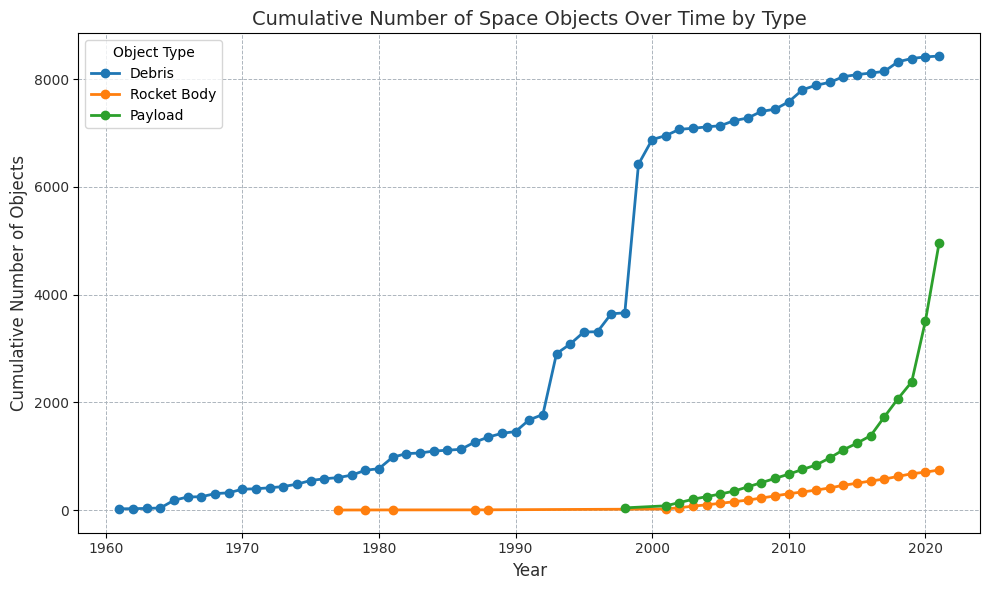

In [21]:
# Preparing cumulative debris data distinct by object types
cumulative_debris_by_type = (
    data.groupby(['LAUNCH_DATE', 'OBJECT_TYPE'])
    .size()
    .groupby(level=1)
    .cumsum()
    .reset_index(name='Cumulative Count')
)

# Plotting cumulative debris by type
plt.figure(figsize=(10, 6))
object_types = cumulative_debris_by_type['OBJECT_TYPE'].unique()

for obj_type in object_types:
    subset = cumulative_debris_by_type[cumulative_debris_by_type['OBJECT_TYPE'] == obj_type]
    plt.plot(
        subset['LAUNCH_DATE'],
        subset['Cumulative Count'],
        label=obj_type,
        marker='o',
        linewidth=2
    )

# Customizing the plot
plt.title('Cumulative Number of Space Objects Over Time by Type', fontsize=14, color=colors['Vacuum Black'])
plt.xlabel('Year', fontsize=12, color=colors['Vacuum Black'])
plt.ylabel('Cumulative Number of Objects', fontsize=12, color=colors['Vacuum Black'])
plt.grid(axis='both', linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
plt.xticks(color=colors['Vacuum Black'], fontsize=10)
plt.yticks(color=colors['Vacuum Black'], fontsize=10)
plt.legend(title='Object Type', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

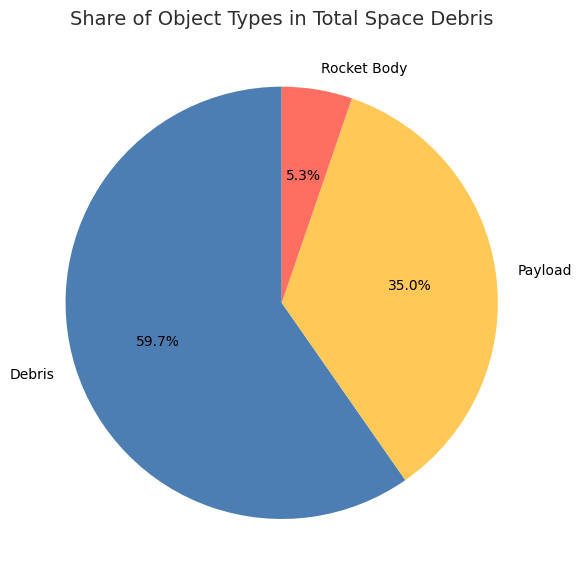

In [22]:
# Grouping data by object type to calculate total counts
object_type_counts = data['OBJECT_TYPE'].value_counts().reset_index()
object_type_counts.columns = ['OBJECT_TYPE', 'Count']

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
     object_type_counts['Count'],
    labels=object_type_counts['OBJECT_TYPE'],
    autopct='%1.1f%%',  # Show percentages
    startangle=90,  # Start pie chart at 90 degrees
    colors=[colors['Primary Blue'], colors['Star Gold'], colors['Rocket Red'], colors['Nebula Purple']]  # Assign colors
)

# Customizing the plot
plt.title('Share of Object Types in Total Space Debris', fontsize=14, color=colors['Vacuum Black'])
plt.tight_layout()

# Show the plot
plt.show()

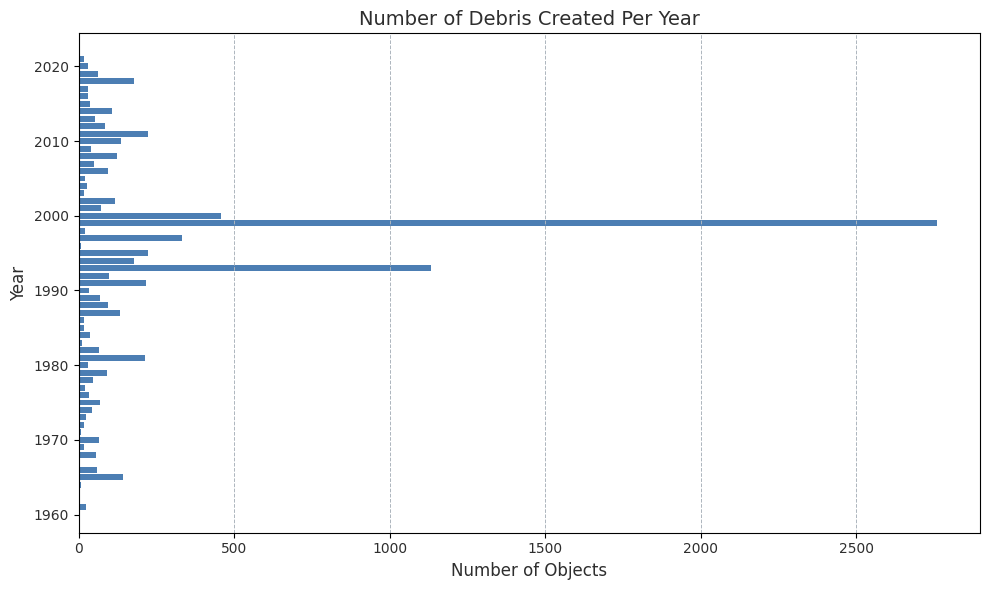

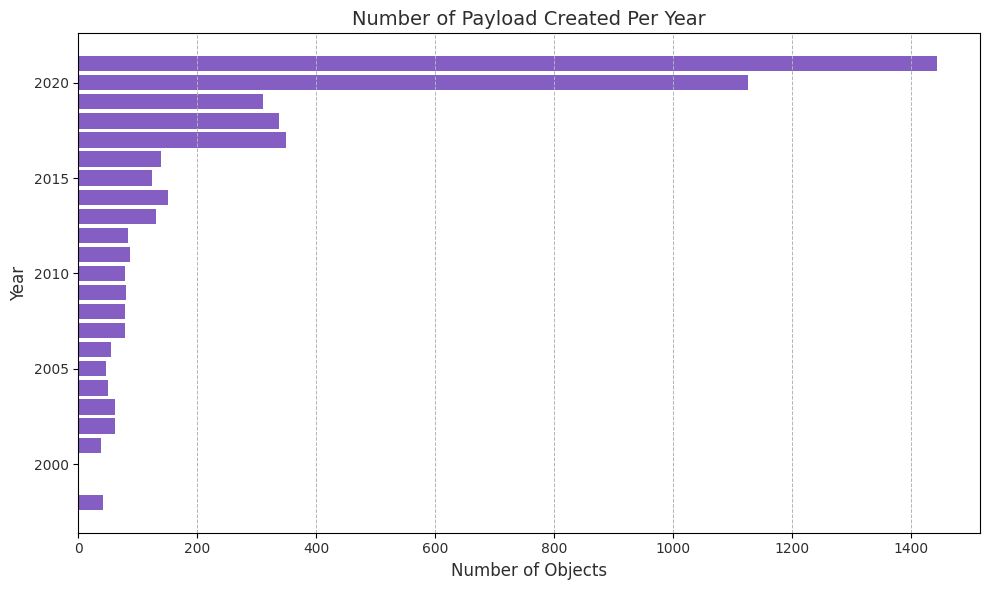

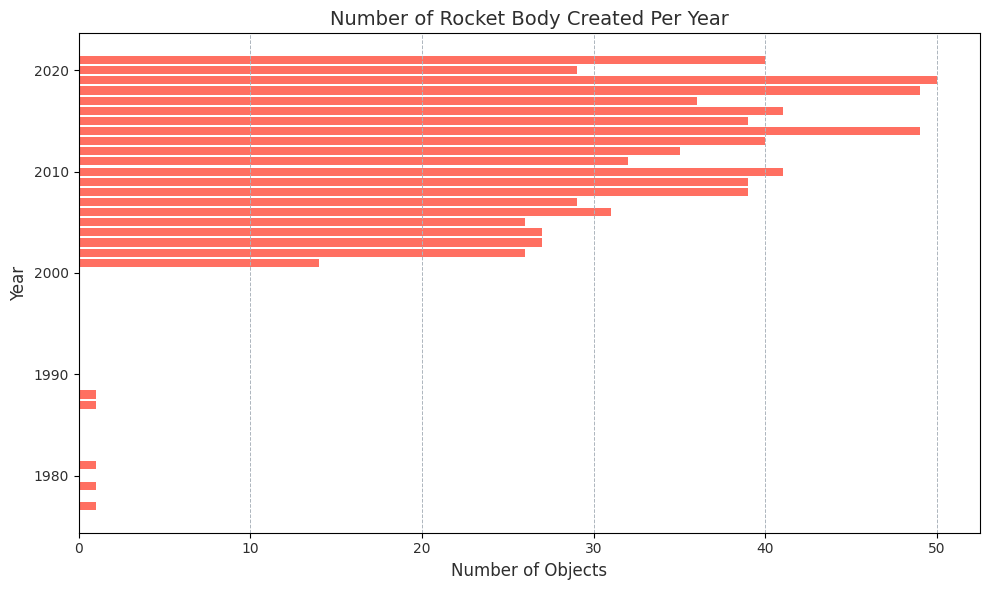

In [23]:
# Plotting each object type over the years with horizontal bars
object_types = data['OBJECT_TYPE'].unique()

for obj_type in object_types:
    # Filter data for the specific object type
    subset = yearly_debris_by_type[yearly_debris_by_type['OBJECT_TYPE'] == obj_type]
    
    # Plot horizontal bars
    plt.figure(figsize=(10, 6))
    plt.barh(subset['LAUNCH_DATE'], subset['Count'], color=type_colors[obj_type])
    
    # Customize the plot
    plt.title(f'Number of {obj_type} Created Per Year', fontsize=14, color=colors['Vacuum Black'])
    plt.xlabel('Number of Objects', fontsize=12, color=colors['Vacuum Black'])
    plt.ylabel('Year', fontsize=12, color=colors['Vacuum Black'])
    plt.grid(axis='x', linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
    plt.xticks(color=colors['Vacuum Black'], fontsize=10)
    plt.yticks(color=colors['Vacuum Black'], fontsize=10)
    plt.tight_layout()
    plt.show()

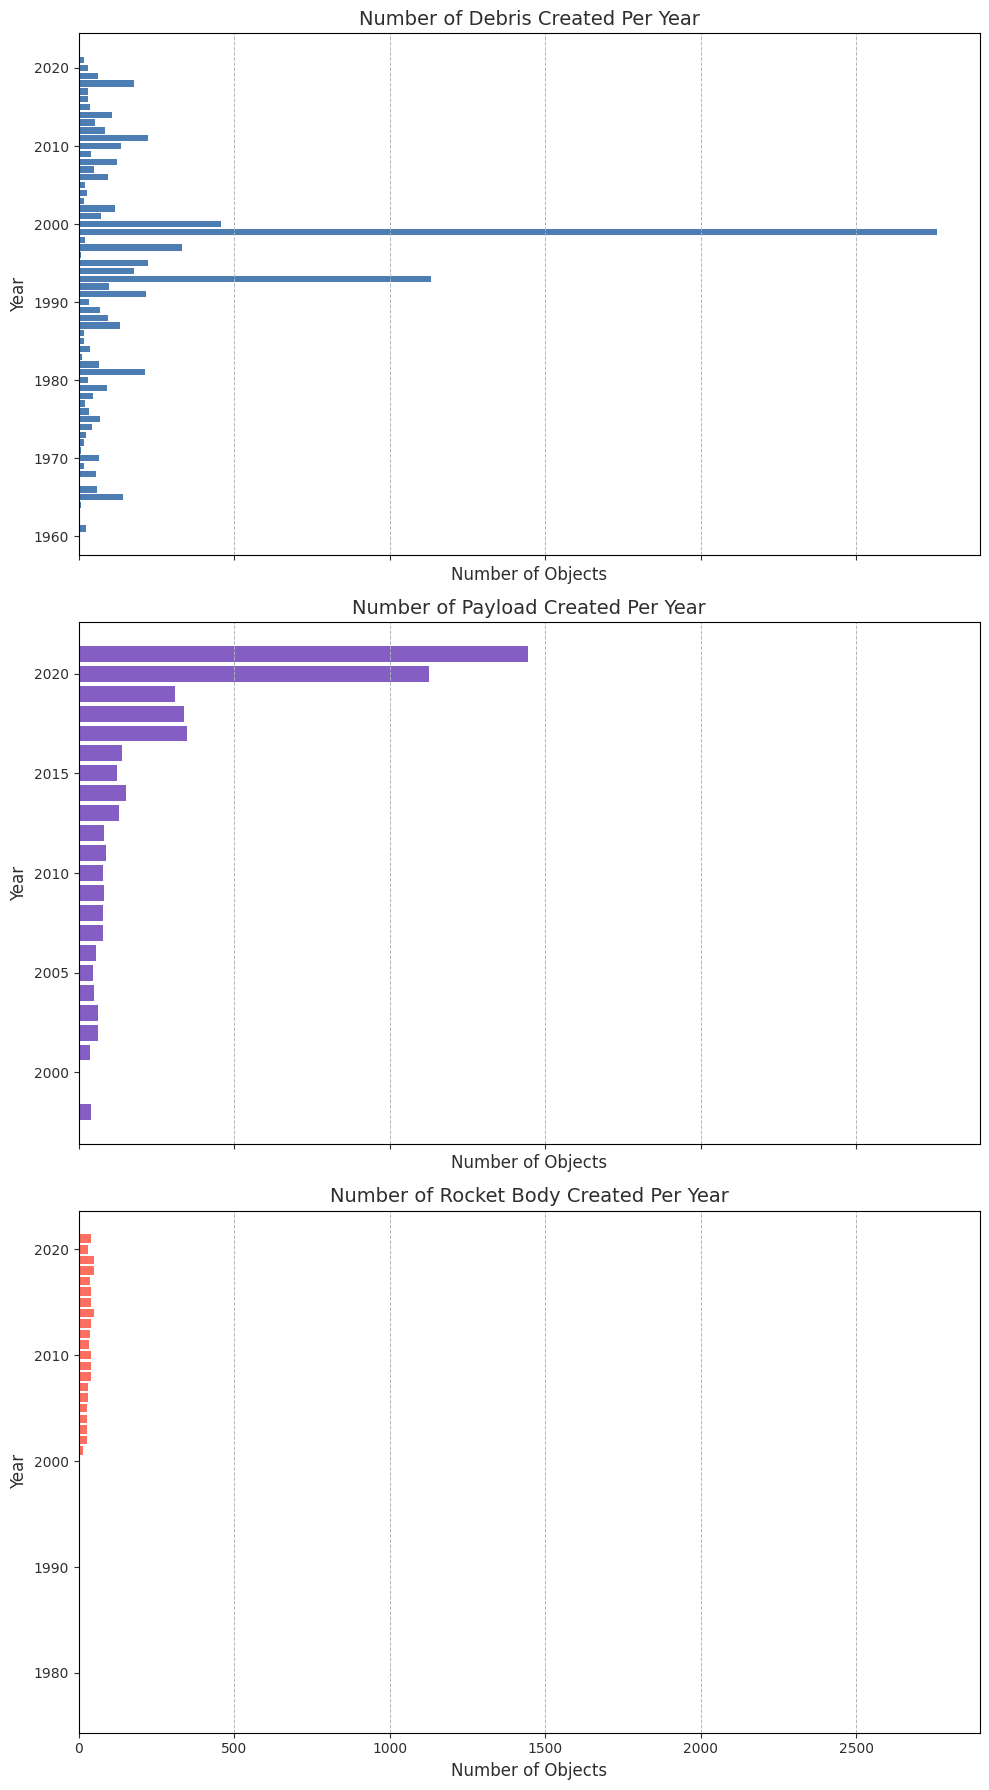

In [24]:
# Create subplots for horizontal bar plots
num_plots = len(object_types)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6 * num_plots), sharex=True)

for i, obj_type in enumerate(object_types):
    # Filter data for the specific object type
    subset = yearly_debris_by_type[yearly_debris_by_type['OBJECT_TYPE'] == obj_type]

    # Plot horizontal bars on the corresponding subplot
    axes[i].barh(subset['LAUNCH_DATE'], subset['Count'], color=type_colors[obj_type])

    # Customize the subplot
    axes[i].set_title(f'Number of {obj_type} Created Per Year', fontsize=14, color=colors['Vacuum Black'])
    axes[i].set_xlabel('Number of Objects', fontsize=12, color=colors['Vacuum Black'])
    axes[i].set_ylabel('Year', fontsize=12, color=colors['Vacuum Black'])
    axes[i].grid(axis='x', linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
    axes[i].tick_params(axis='x', colors=colors['Vacuum Black'], labelsize=10)
    axes[i].tick_params(axis='y', colors=colors['Vacuum Black'], labelsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

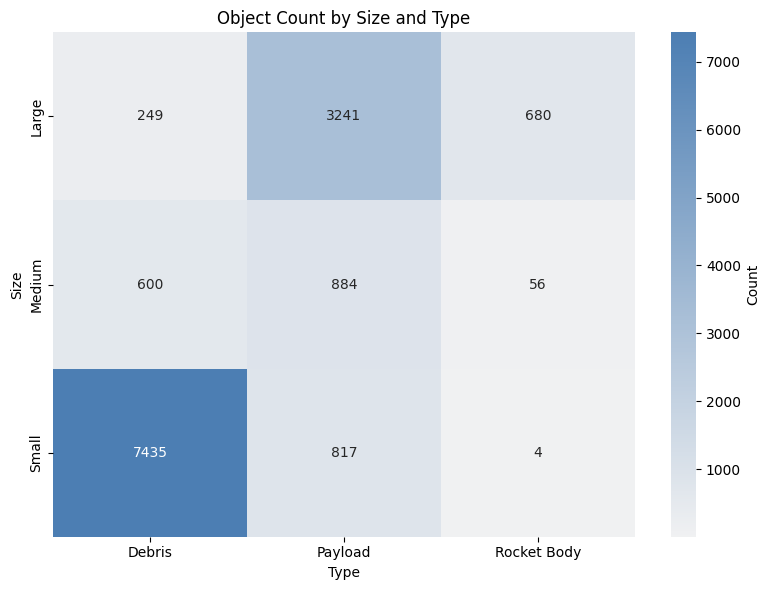

In [13]:
# Grouping and calculating counts
grouped_data = data.groupby(['RCS_SIZE', 'OBJECT_TYPE']).size().reset_index(name='Count')

# Pivot the data to create a matrix for the heatmap
heatmap_data = grouped_data.pivot(index='RCS_SIZE', columns='OBJECT_TYPE', values='Count').fillna(0)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True,  # Show values in cells
    fmt='g',  # General format for integer values
    cmap=sns.light_palette(colors['Primary Blue'], as_cmap=True), # Color map
    cbar_kws={'label': 'Count'}  # Label for the color bar
)

# Customize the plot
plt.title('Object Count by Size and Type')
plt.xlabel('Type')
plt.ylabel('Size')
plt.tight_layout()

# Show the plot
plt.show()

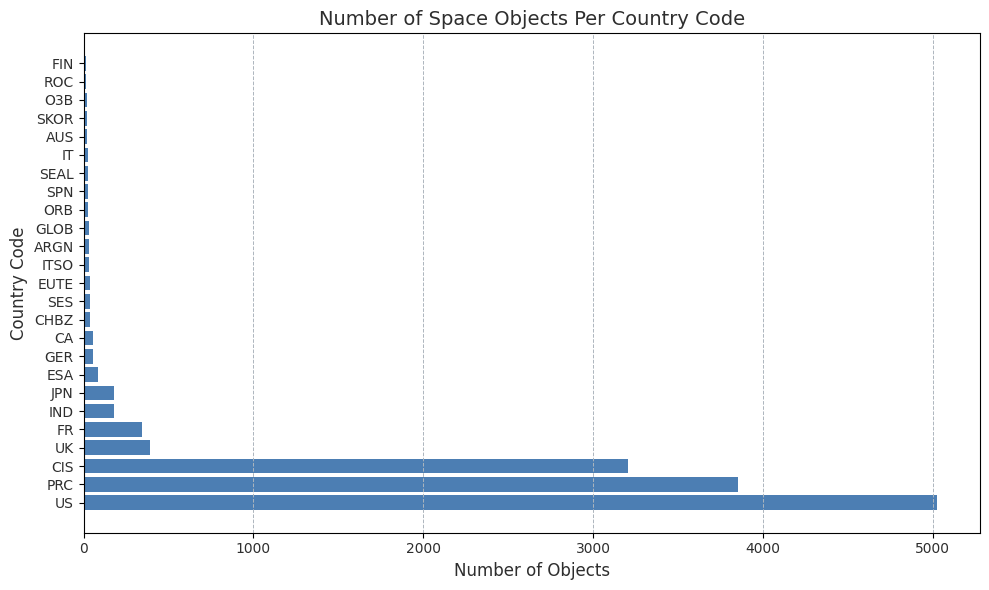

In [25]:
# Grouping data by country code to calculate the count of objects
country_code_counts = data.groupby('COUNTRY_CODE').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
top_25_countries = country_code_counts.head(25)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(top_25_countries['COUNTRY_CODE'], top_25_countries['Count'], color=colors['Primary Blue'])

# Customizing the plot
plt.title('Number of Space Objects Per Country Code', fontsize=14, color=colors['Vacuum Black'])
plt.xlabel('Number of Objects', fontsize=12, color=colors['Vacuum Black'])
plt.ylabel('Country Code', fontsize=12, color=colors['Vacuum Black'])
plt.grid(axis='x', linestyle='--', linewidth=0.7, color=colors['Satellite Gray'])
plt.xticks(color=colors['Vacuum Black'], fontsize=10)
plt.yticks(color=colors['Vacuum Black'], fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()